In [ ]:
import pandas as pd

df = pd.read_csv("german_credit_data.csv") 

df.head()


,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


In [104]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
dtypes: int64(5), object(5)
memory usage: 78.3+ KB


In [105]:
df.describe()

,Unnamed: 0,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,1.904000,3271.258000,20.903000
std,288.819436,11.375469,0.653614,2822.736876,12.058814
min,0.000000,19.000000,0.000000,250.000000,4.000000
25%,249.750000,27.000000,2.000000,1365.500000,12.000000
50%,499.500000,33.000000,2.000000,2319.500000,18.000000
75%,749.250000,42.000000,2.000000,3972.250000,24.000000
max,999.000000,75.000000,3.000000,18424.000000,72.000000


In [106]:
print("\nMissing values in each column:")
print(df.isnull().sum())



Missing values in each column:
Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64


In [107]:
df = df.dropna()

print("\nMissing values after removing rows with null values:")
print(df.isnull().sum())



Missing values after removing rows with null values:
Unnamed: 0          0
Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
dtype: int64


In [108]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car
7,7,35,male,3,rent,little,moderate,6948,36,car
9,9,28,male,3,own,little,moderate,5234,30,car


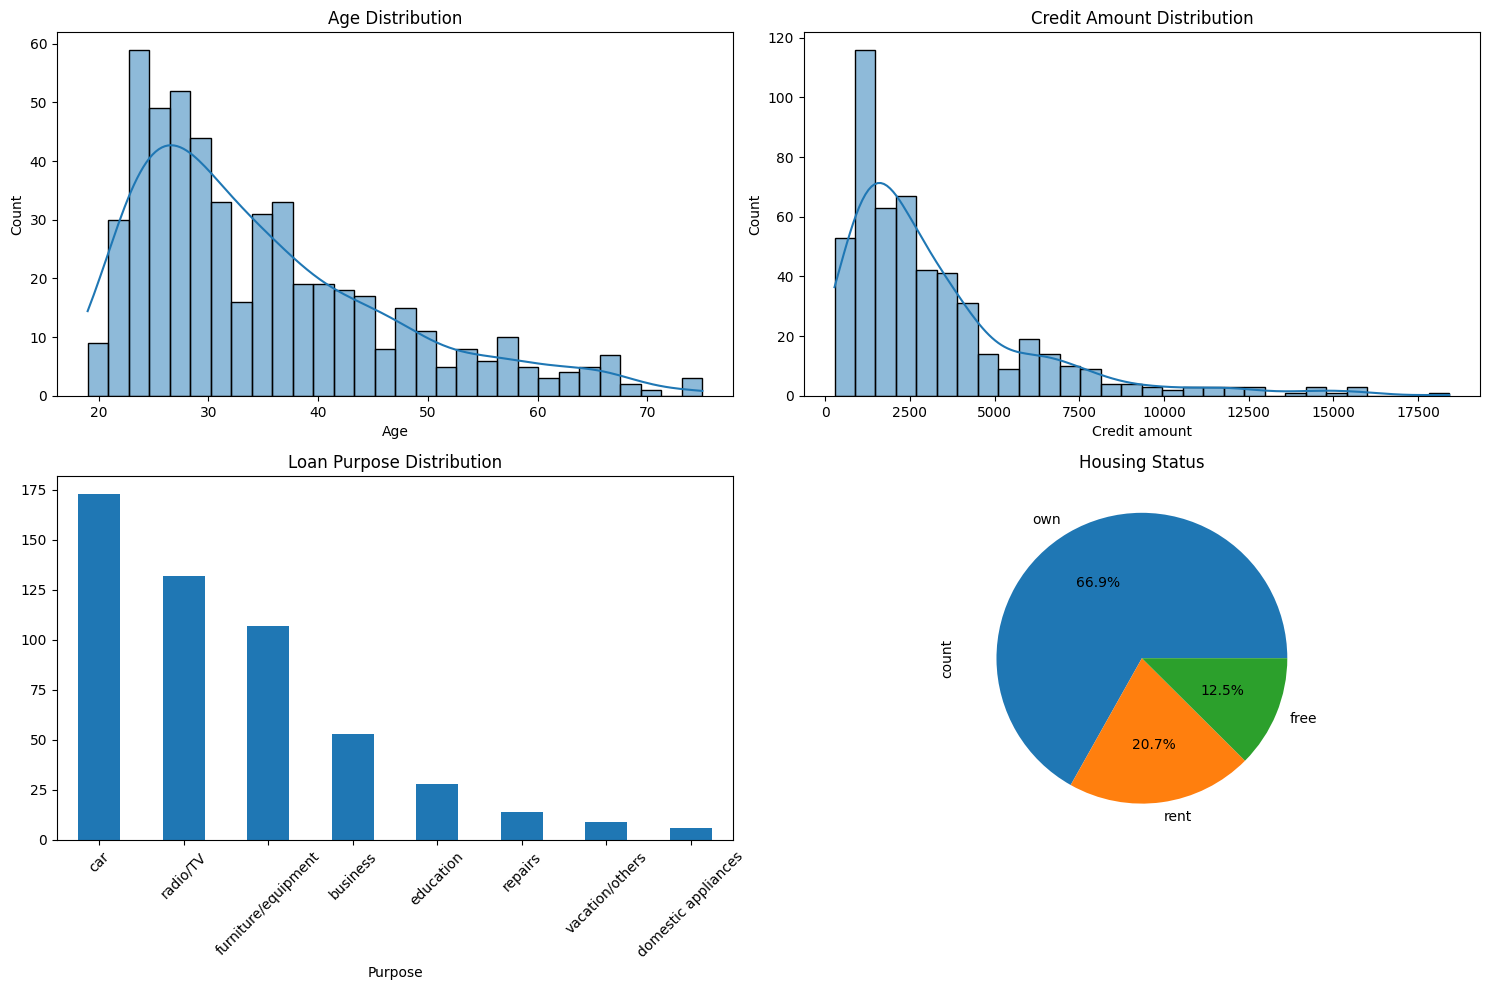

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.figure(figsize=(15, 10))

# Setting 'kde=True' in Seaborn adds a smooth curve to the histogram, 
# which shows an estimate of the data's distribution. This curve is 
# calculated using statistical techniques to better visualize the shape of the data.

# Specifying 'bins=30' divides the range of data into 30 equal-sized intervals. 
# Each bin represents the count of data points that fall within its range, 
# helping to understand the data distribution.

# Age distribution
plt.subplot(2, 2, 1)
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution')

# Credit amount distribution
plt.subplot(2, 2, 2)
sns.histplot(df['Credit amount'], bins=30, kde=True)
plt.title('Credit Amount Distribution')

# Purpose counts
plt.subplot(2, 2, 3)
df['Purpose'].value_counts().plot(kind='bar')
plt.title('Loan Purpose Distribution')
plt.xticks(rotation=45)

# Housing status
plt.subplot(2, 2, 4)
df['Housing'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Housing Status')

plt.tight_layout()
plt.show()

In [110]:
df['CreditRisk'] = np.where(
    (
        (df['Credit amount'] > df['Credit amount'].median()) &
        (df['Duration'] > df['Duration'].median())
    ) |
    (
        (df['Saving accounts'].isin(['little', 'no saving'])) &
        (df['Checking account'].isin(['little', 'no checking']))
    ) |
    (df['Job'].isin([0])),  # Add Job as a risk factor
    1,  # High risk
    0   # Low risk
)







In [111]:
features = ['Duration', 'Credit amount', 'Job', 'Saving accounts']
target = 'CreditRisk'  # Update this if your target column is named differently
X = df[features]
y = df[target]


In [112]:
categorical_features = ['Job', 'Saving accounts']
numerical_features = ['Duration', 'Credit amount']

In [113]:
#Why use a Pipeline?
#The pipeline combines these two steps so they’re applied in sequence. It ensures:
#Clean, consistent preprocessing.
#Easy integration into machine learning workflows like GridSearchCV or Pipeline



In [114]:
X

,Duration,Credit amount,Job,Saving accounts
1,48,5951,2,little
3,42,7882,2,little
4,24,4870,2,little
7,36,6948,3,little
9,30,5234,3,little
...,...,...,...,...
989,24,1743,1,little
993,36,3959,3,little
996,30,3857,3,little
998,45,1845,2,little


In [115]:
y

1      1
3      1
4      1
7      1
9      1
      ..
989    0
993    1
996    1
998    1
999    1
Name: CreditRisk, Length: 522, dtype: int64

In [ ]:
# 1. Define numerical & categorical feature lists
numerical_features = ['Age', 'Credit amount', 'Duration']
categorical_features = ['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']

# 2. Create transformers
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numerical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='mean'))
])

# 3. Combine transformers into ColumnTransformer
preprocessor = ColumnTransformer([
    ('num', numerical_transformer, numerical_features),
    ('cat', categorical_transformer, categorical_features)
])

# 4. Split the raw dataframe into X/y
X = df[numerical_features + categorical_features]  # Only select relevant columns
y = df['CreditRisk']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Create a pipeline and GridSearch
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5],
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# 6. Evaluate on test set
print("Best parameters:")
print(grid_search.best_params_)
print("\nClassification report on test set:")
print(classification_report(y_test, grid_search.predict(X_test)))

# High Precision (1) → When your model says someone is a bad credit risk, it’s almost always right.

# High Recall (0 & 1) → It’s also catching almost all the true bad AND good cases.

# Balanced F1-Score → Your model is not biased toward one class.


Best parameters:
{'classifier__max_depth': None, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 200}

Classification report on test set:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95        38
           1       0.98      0.96      0.97        67

    accuracy                           0.96       105
   macro avg       0.95      0.96      0.96       105
weighted avg       0.96      0.96      0.96       105



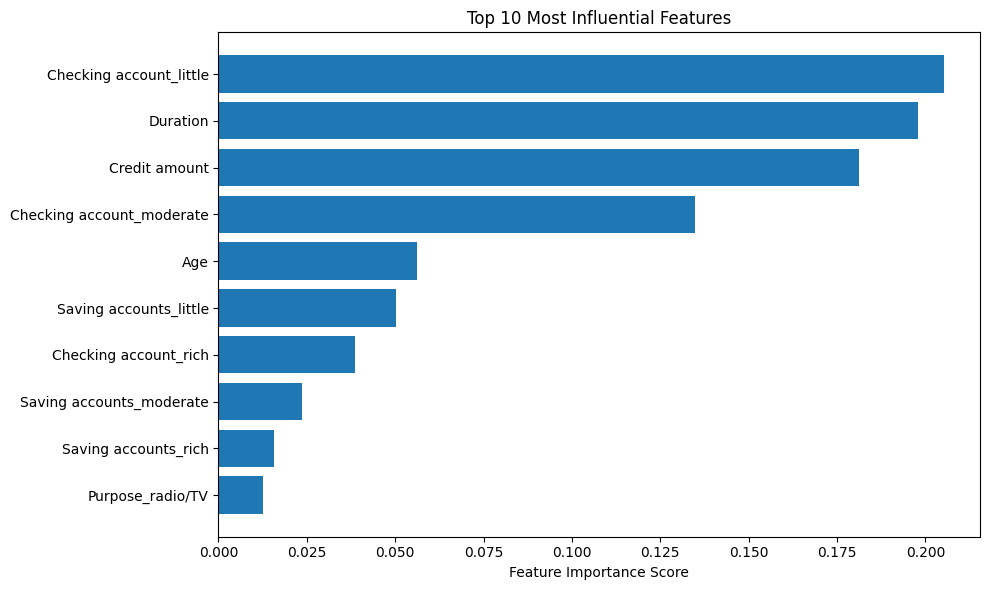

In [117]:
import matplotlib.pyplot as plt
import numpy as np

# Get one-hot encoded feature names from preprocessor
# Extract onehot feature names
ohe = grid_search.best_estimator_.named_steps['preprocessor']\
    .named_transformers_['cat'].named_steps['onehot']

cat_feature_names = ohe.get_feature_names_out(categorical_features)

# Combine numerical and categorical feature names
all_feature_names = numerical_features + list(cat_feature_names)

# Get feature importances
importances = grid_search.best_estimator_.named_steps['classifier'].feature_importances_
indices = np.argsort(importances)[::-1]

# Plot top 10
plt.figure(figsize=(10,6))
plt.title("Top 10 Most Influential Features")
plt.barh(range(10), importances[indices[:10]][::-1])
plt.yticks(range(10), [all_feature_names[i] for i in indices[:10]][::-1])
plt.xlabel("Feature Importance Score")
plt.tight_layout()
plt.show()


In [118]:
df['Credit amount'].median()

np.float64(2326.5)

In [119]:
df['Duration'].median()

np.float64(18.0)

In [120]:
# Example single sample (dictionary with feature names)
sample = pd.DataFrame([{
    'Age': 35,
    'Sex': 'male',
    'Job': 2,
    'Housing': 'own',
    'Saving accounts': 'little',
    'Checking account': 'no checking',
    'Credit amount': 3000,
    'Duration': 12,
    'Purpose': 'radio/TV'
}])

# Predict
prediction = grid_search.predict(sample)
print("Prediction:", "High Risk" if prediction[0] == 1 else "Low Risk")


Prediction: Low Risk


In [121]:
import joblib

# Save the best model from GridSearchCV
joblib.dump(grid_search.best_estimator_, "credit_model.pkl")


['credit_model.pkl']

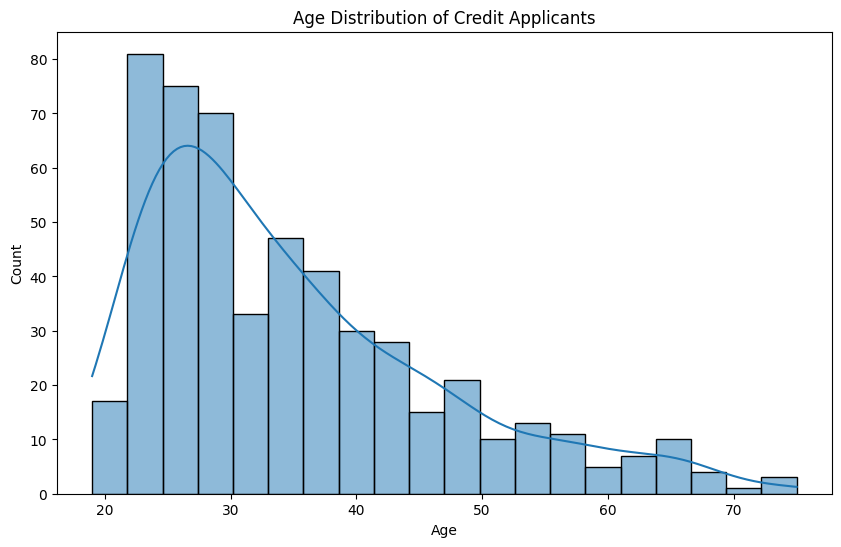

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution of Credit Applicants')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

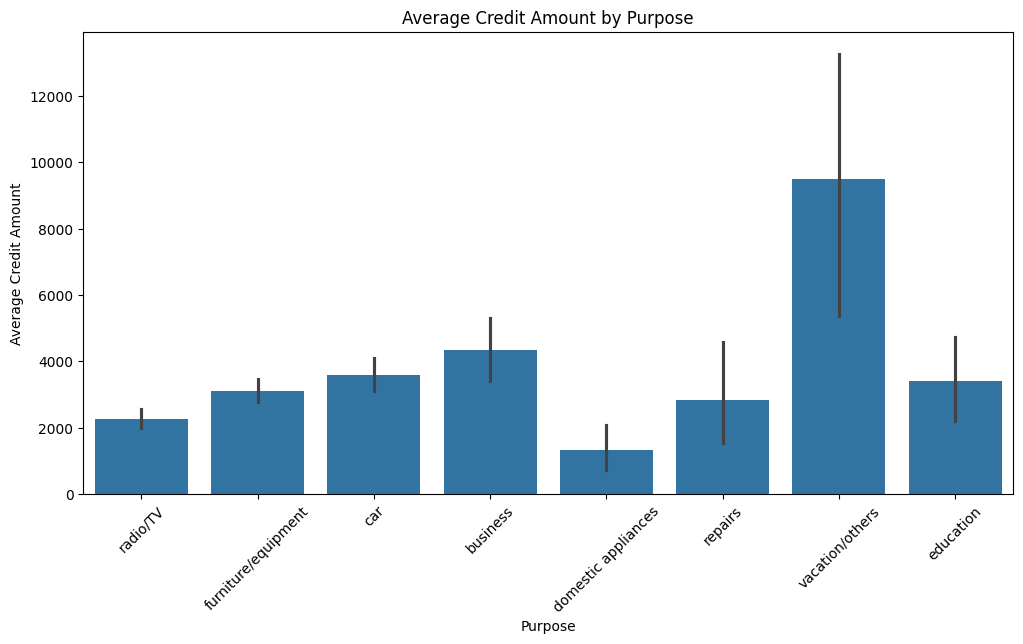

In [123]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Purpose', y='Credit amount', data=df)
plt.title('Average Credit Amount by Purpose')
plt.xlabel('Purpose')
plt.ylabel('Average Credit Amount')
plt.xticks(rotation=45)
plt.show()

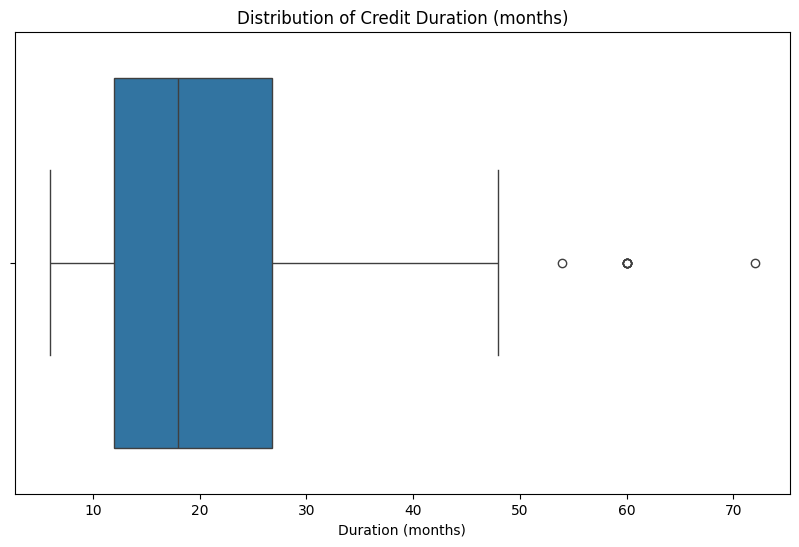

In [124]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Duration'])
plt.title('Distribution of Credit Duration (months)')
plt.xlabel('Duration (months)')
plt.show()

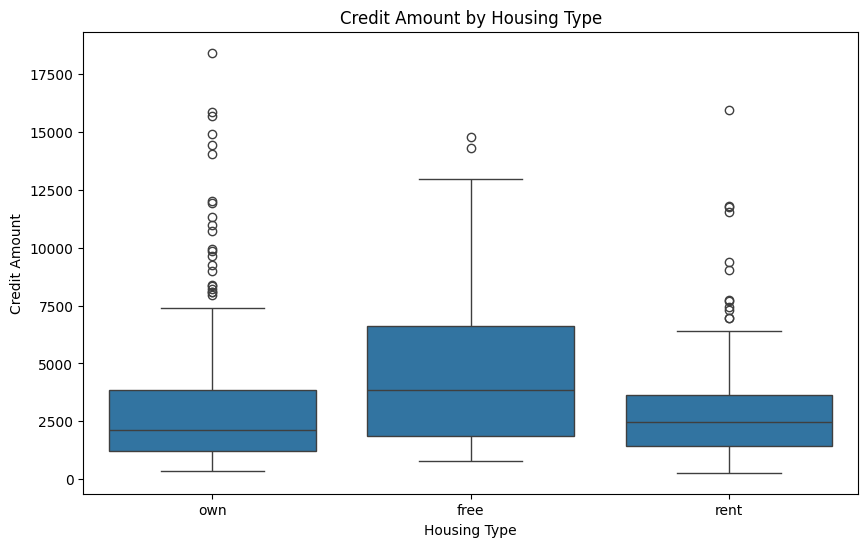

In [125]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Housing', y='Credit amount', data=df)
plt.title('Credit Amount by Housing Type')
plt.xlabel('Housing Type')
plt.ylabel('Credit Amount')
plt.show()

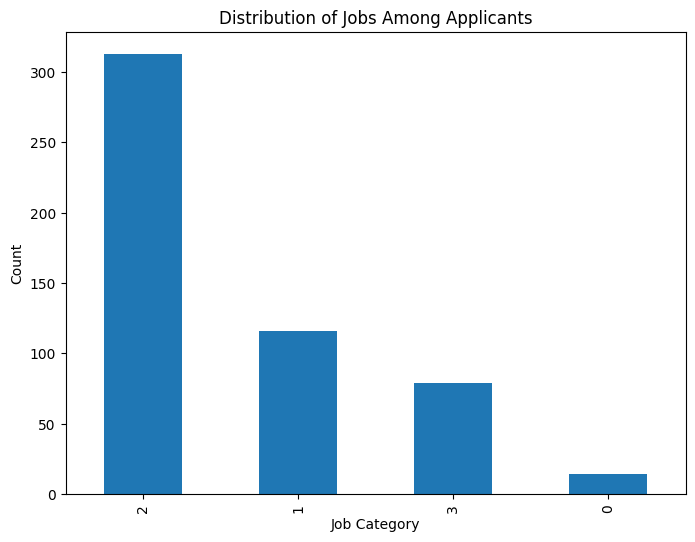

In [126]:
plt.figure(figsize=(8, 6))
df['Job'].value_counts().plot(kind='bar')
plt.title('Distribution of Jobs Among Applicants')
plt.xlabel('Job Category')
plt.ylabel('Count')
plt.show()

<Figure size 1000x600 with 0 Axes>

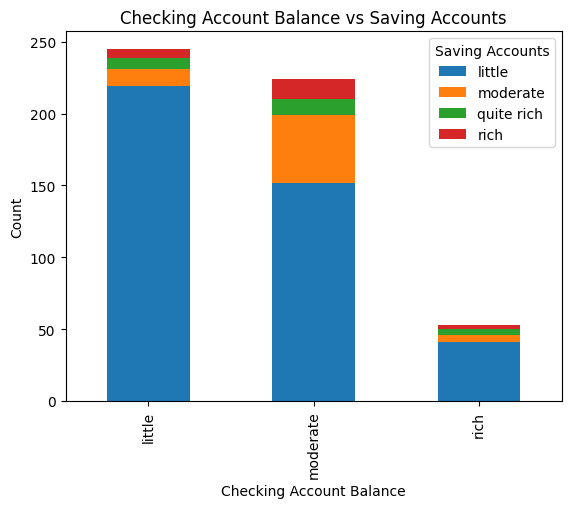

In [127]:
plt.figure(figsize=(10, 6))
pd.crosstab(df['Checking account'], df['Saving accounts']).plot(kind='bar', stacked=True)
plt.title('Checking Account Balance vs Saving Accounts')
plt.xlabel('Checking Account Balance')
plt.ylabel('Count')
plt.legend(title='Saving Accounts')
plt.show()

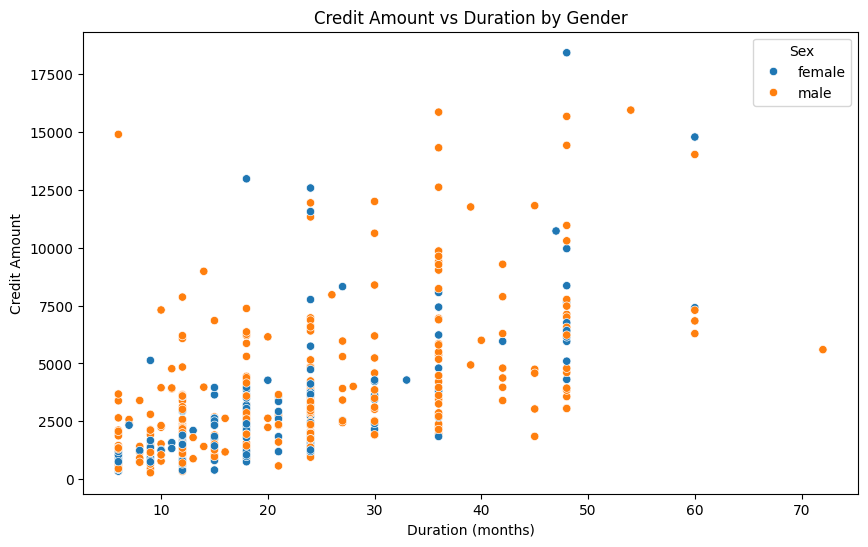

In [128]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Duration', y='Credit amount', hue='Sex', data=df)
plt.title('Credit Amount vs Duration by Gender')
plt.xlabel('Duration (months)')
plt.ylabel('Credit Amount')
plt.show()